In [23]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [14]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [15]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [16]:
# Print column names to verify
print(df_market_data.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [17]:
# Use the StandardScaler module from scikit-learn to normalize the data
numeric_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns
data_to_scale = df_market_data[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)


In [18]:
#
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Add the 'coin_id' column back to the scaled DataFrame
scaled_df['coin_id'] = df_market_data.index  # Use the index from the original DataFrame

# Set 'coin_id' as the index for the new DataFrame
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
scaled_df.head()





price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

---

### Find the Best Value for k Using the Original Data.

In [19]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [20]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Display the inertia values
print(inertia_values)


C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 65.302379141625, 54.7399219421002, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Display the dictionary
print(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


{'k_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia_values': [287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 65.302379141625, 54.7399219421002, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]}
    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       54.739922
6          7       43.481606
7          8       37.517032
8          9       32.591891
9         10       28.222899
10        11       24.116198


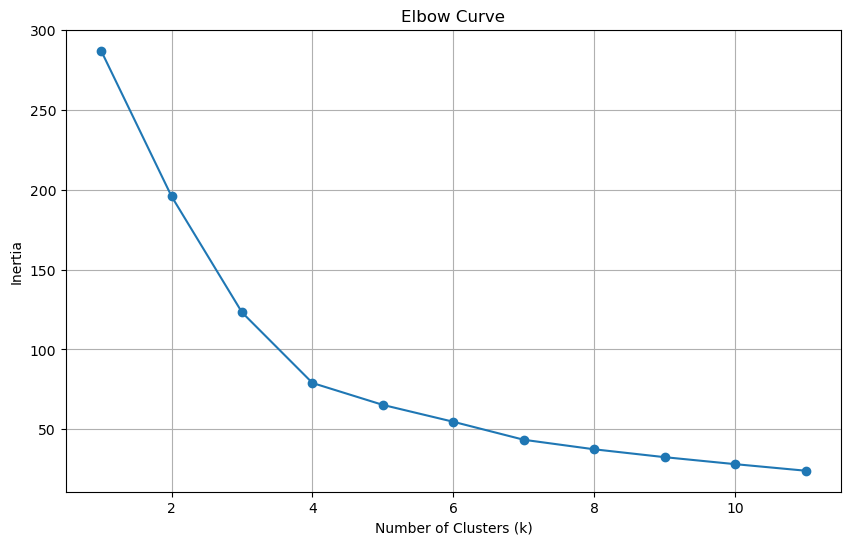

In [24]:
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** K4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [25]:
# Initialize the K-Means model with the best value for k
best_k = 4  

kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [26]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)


C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values
print(clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [28]:
# Create a copy of the DataFrame
df_with_clusters = scaled_df.copy()


In [29]:
# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['predicted_clusters'] = clusters

# Display sample data
df_with_clusters.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  predicted_clusters  
coin_id                                                       
bitcoin                        -0.251637                   0  
ethereum                       -0.199352                   0  
tether                         -0.282061                   2  
ripple                         -0.295546                   2  
bitcoin-cash                   -0.270317                   0

In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",  # Color points based on predicted clusters
    cmap="viridis",  # Specify the colormap (adjust as needed)
    title="Cryptocurrency Clusters",
    hover_cols=["coin_id"],  # Add 'coin_id' to identify each cryptocurrency
    xlabel="Price Change (24h)",
    ylabel="Price Change (7d)",
    width=800,  # Adjust width as needed
    height=600,  # Adjust height as needed
)

# Show the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [32]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_data = pca_model.fit_transform(scaled_df)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Add the 'coin_id' column back to the PCA DataFrame
pca_df['coin_id'] = scaled_df.index

# Set 'coin_id' as the index for the new DataFrame
pca_df.set_index('coin_id', inplace=True)

# View the first five rows of the DataFrame
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [33]:
# Retrieve the explained variance ratio
explained_variance_ratio = pca_model.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Explained Variance Ratio for PC{i}: {ratio:.4f}")


Explained Variance Ratio for PC1: 0.3720
Explained Variance Ratio for PC2: 0.3470
Explained Variance Ratio for PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50

In [35]:
# Create a new DataFrame with the PCA data
pca_result_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
pca_result_df['coin_id'] = scaled_df.index

# Set the 'coin_id' column as the index
pca_result_df.set_index('coin_id', inplace=True)

# Display sample data
pca_result_df.head()


PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

---

### Find the Best Value for k Using the PCA Data

In [36]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [37]:
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using df_market_data_pca
    kmeans_model.fit(pca_result_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [38]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(pca_elbow_df)

    k_values  inertia_values
0          1      256.874086
1          2      165.901994
2          3       93.774626
3          4       49.665497
4          5       37.839466
5          6       30.777746
6          7       21.134056
7          8       17.091637
8          9       13.681140
9         10       10.630648
10        11        8.128620


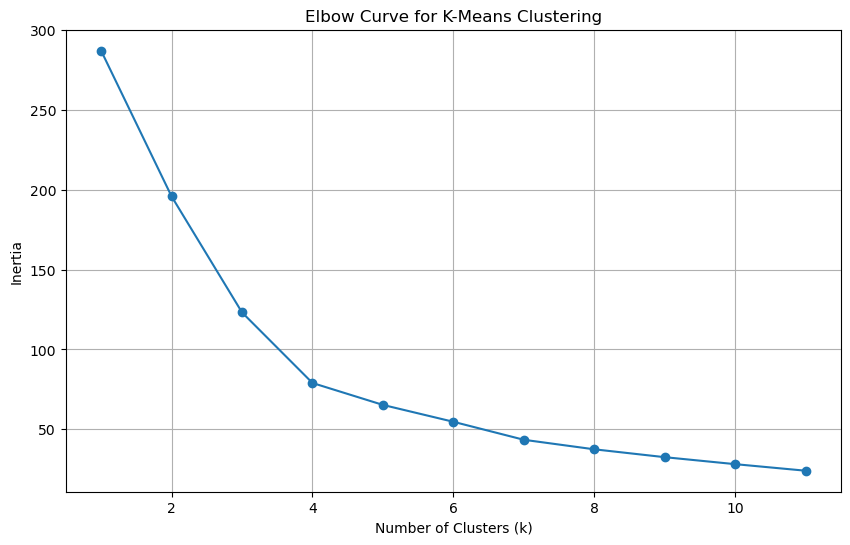

In [39]:
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** K4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [41]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_data)


C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\16474\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_data)

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [43]:
# Create a copy of the DataFrame with the PCA data
pca_result_with_clusters = pca_result_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_result_with_clusters['predicted_cluster'] = predicted_clusters

# Display sample data
pca_result_with_clusters.head()


PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  2
ripple       -0.471835 -0.222660 -0.479053                  2
bitcoin-cash -1.157800  2.041209  1.859715                  0

In [44]:
# Create a scatter plot using hvPlot
scatter_plot = pca_result_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='predicted_cluster',
    hover_cols=['coin_id'],
    title='K-Means Clustering Results',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)'
)

# Show the plot
scatter_plot


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [46]:
# Composite plot to contrast the Elbow curves
# Create separate scatter plots for original data and PCA data
scatter_original = elbow_df.hvplot.scatter(
    x='k_values',
    y='inertia_values',
    title='Original Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

scatter_pca = pca_elbow_df.hvplot.scatter(
    x='k_values',
    y='inertia_values',
    title='PCA Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

# Create a composite plot using the + operator
composite_plot = scatter_original + scatter_pca

# Show the composite plot
composite_plot

:Layout
   .Scatter.I  :Scatter   [k_values]   (inertia_values)
   .Scatter.II :Scatter   [k_values]   (inertia_values)

In [47]:
# Composite plot to contrast the clusters
# Create a scatter plot for the clusters of the original data
scatter_original_clusters = df_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_clusters',
    hover_cols=['coin_id'],
    title='Clusters from Original Data',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)'
)

# Create a scatter plot for the clusters of the PCA data
scatter_pca_clusters = pca_result_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='predicted_cluster',
    hover_cols=['coin_id'],
    title='Clusters from PCA Data',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)'
)

# Combine both scatter plots into a single chart
composite_cluster_plot = scatter_original_clusters + scatter_pca_clusters

# Show the composite plot
composite_cluster_plot

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using fewer features to cluster the data using K-Means can be observed in both the Elbow curves and the scatter plots. When clustering was performed on the original data, it had more data points being represented and with reducing and using fewer features might show optimal grouping.